<a href="https://colab.research.google.com/github/davidxxmm/Analisis-RFM-/blob/main/Analisis_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conecto el drive al Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Abro el archivo y lo veo por *arriba*

In [2]:
import pandas as pd


archivo = pd.read_csv('/content/drive/MyDrive/Retail/online_retail_listing.csv',delimiter=';',encoding="latin-1")

archivo.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


Reviso columnas, tipo de datos, cantidad de registros[texto del enlace] 

In [3]:
archivo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


Es cortito, da una idea del archivo, no es necesario con el comando de arriba realizado.

In [4]:
archivo.shape

(1048575, 8)

In [5]:
len(archivo["Description"].unique()) 

5698

In [6]:
len(archivo["Invoice"].unique()) 


52961

In [7]:
archivo["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    5875
REGENCY CAKESTAND 3 TIER              4364
JUMBO BAG RED RETROSPOT               3426
ASSORTED COLOUR BIRD ORNAMENT         2928
PARTY BUNTING                         2746
Name: Description, dtype: int64

Aca se pone bueno, empezamos a jugar con la info del archivo. Esta bueno para ver como se hacen los group by y sumarizacion. Es importante ver que todo eso, se devuelve en un dataframe.



In [8]:
archivo.groupby("Description").agg({"Quantity":"sum"}  ).head()

,Quantity
Description,
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,690
4 PURPLE FLOCK DINNER CANDLES,302
50'S CHRISTMAS GIFT BAG LARGE,1875
ANIMAL STICKERS,385


Vale agrupar y sumarizar, en si no deja de ser distinto a un SQL


In [9]:
archivo.groupby(["Description", "Invoice" ]).agg({"Quantity":"sum"}  )

Quantity
Description                         Invoice          
  DOORMAT UNION JACK GUNS AND ROSES 493716          1
                                    493947          1
                                    493961          1
                                    493969         10
                                    493982          3
...                                               ...
wrongly marked carton 22804         575722       -256
wrongly marked. 23343 in box        560039      -3100
wrongly sold (22719) barcode        546408        170
wrongly sold as sets                546018       -600
wrongly sold sets                   546023       -975

[998321 rows x 1 columns]

Agrega una columna, formate campos. Prestar atencion a como eliminar la anotacion cientifica. Se hace con el astype, sino aparece la e+ en el numero.

In [10]:
#archivo["TotalPrice"] = archivo["Price"].to_numeric()*archivo["Quantity"]

#archivo["Price"] = archivo["Price"].astype(float, errors = "ignore")


archivo["Price"] = archivo["Price"].str.replace(",", ".").astype(float, errors = "ignore")

archivo["TotalPrice"] = archivo["Price"] *archivo["Quantity"]

archivo.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.0,United Kingdom,30.0


In [11]:
archivo.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
489434,505.30
489435,145.80
489436,630.33
489437,310.75
489438,2286.24


Usamos un grafico de barra, para representar las ventas por paises. *texto en cursiva*

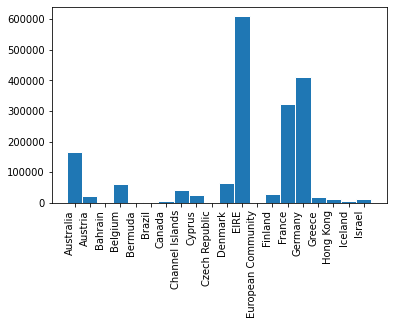

In [12]:
import matplotlib.pyplot as plt

graf_values = archivo.groupby("Country").agg({"TotalPrice":"sum"}).round(decimals=2).head(20)

#print(graf_values.index.values )

#print(graf_values["TotalPrice"].values.astype(str))

x = graf_values.index.values
y = graf_values["TotalPrice"].values

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white")

fig.autofmt_xdate(rotation=90) 

plt.show()